# College Football Exploratory Data Analysis

## Importing and Describing Data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

game_data = pd.read_csv('game_data_2022_clean.csv')
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attendance          0 non-null      float64
 1   away_conference     3615 non-null   object 
 2   away_division       3615 non-null   object 
 3   away_id             3668 non-null   int64  
 4   away_line_scores    3655 non-null   object 
 5   away_points         3367 non-null   float64
 6   away_post_win_prob  1409 non-null   float64
 7   away_postgame_elo   735 non-null    float64
 8   away_pregame_elo    738 non-null    float64
 9   away_team           3668 non-null   object 
 10  completed           3668 non-null   bool   
 11  conference_game     3668 non-null   bool   
 12  excitement_index    1413 non-null   float64
 13  highlights          0 non-null      float64
 14  home_conference     3659 non-null   object 
 15  home_division       3659 non-null   object 
 16  home_i

## Ploting Points

(0.0, 900.0)

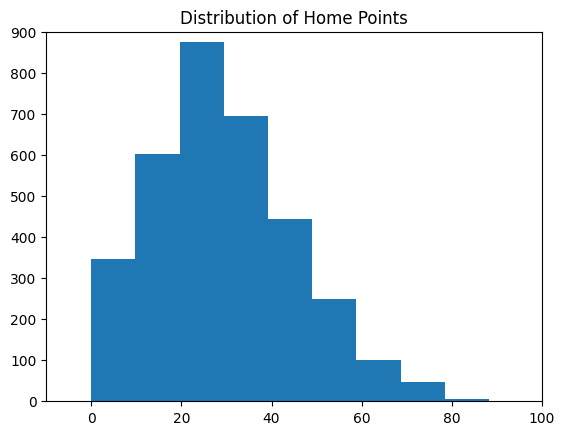

In [15]:
plt.title('Distribution of Home Points')
plt.hist(game_data['home_points'])
plt.xlim([-10, 100])
plt.ylim([0,900])

(0.0, 900.0)

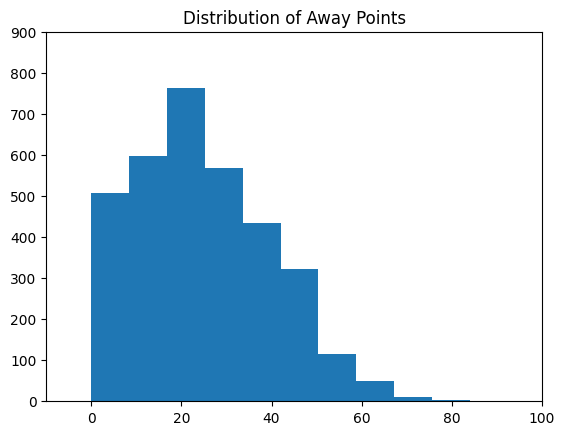

In [16]:
plt.title('Distribution of Away Points')
plt.hist(game_data['away_points'])
plt.xlim([-10, 100])
plt.ylim([0,900])

(-10.0, 100.0)

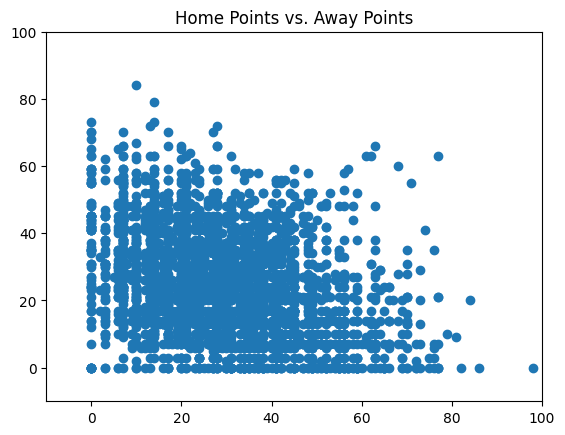

In [19]:
plt.title('Home Points vs. Away Points')
plt.scatter(x = game_data['home_points'], y = game_data['away_points'])
plt.xlim([-10, 100])
plt.ylim([-10, 100])

(-10.0, 100.0)

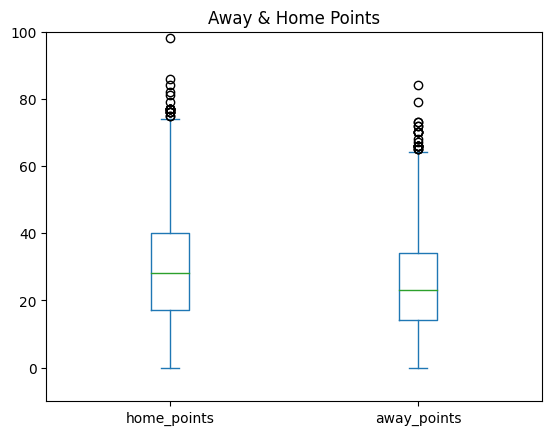

In [52]:
game_data[['home_points', 'away_points']].plot(kind='box')
plt.title('Away & Home Points')
plt.ylim([-10, 100])

It appears that home teams have a slight advantage vs. away teams as their distribution is higher.